<a href="https://colab.research.google.com/github/annaluizacaraciolo/DeepLearning2023/blob/main/ListaPraticaMLPConv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LISTA PRÁTICA DAS UNIDADES 1 E 2**

Pode ser feita com o grupo do projeto. Recomendo pair/group programming para que todos vejam um pouco de todas as partes.


Treine e avalie 4 modelos de classificação para a base de dados de "handwritten digits" do MNIST https://en.wikipedia.org/wiki/MNIST_database.



1.   Um modelo base que não seja uma rede neural, como _decision tree, xgboost, random forest_, etc. Recomendação: use o sklearn (https://scikit-learn.org/).

2.   Uma MLP

3. Uma rede convolucional criada por ti. Recomendação: https://pytorch.org/

4. Use um modelo pre treinado já consolidado na literatura para fazer _transfer learning_. Recomendações: https://pytorch.org/hub/pytorch_vision_vgg/


Compare os resultados dos modelos:
* plote gráficos que mostrem as acurácias de cada modelo
* indique para cada modelo qual foi o digito mais dificil de classificar (indique qual métrica usou para concluir isso)
* argumente qual o melhor modelo levando em consideração o tempo de execução e acurácia.

Recomendação use:
https://pytorch.org/vision/main/generated/torchvision.datasets.MNIST.html .



# Imports e Downloads

In [ ]:
!pip install torch
!pip install torchvision

In [2]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable

In [3]:

train_data = dsets.MNIST(root = './data', train = True,
                        transform = transforms.ToTensor(), download = True)

test_data = dsets.MNIST(root = './data', train = False,
                       transform = transforms.ToTensor())

100%|██████████| 9912422/9912422 [00:00<00:00, 102474406.47it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 23911506.87it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 26242183.94it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 5128002.36it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



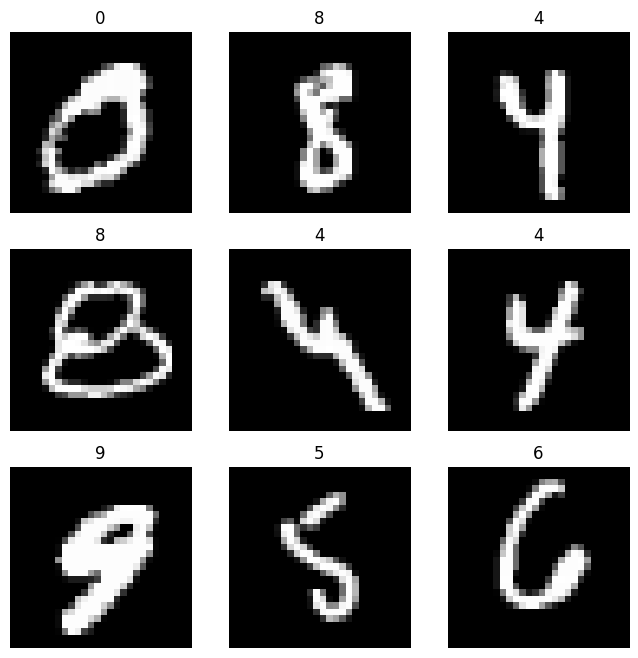

In [7]:
labels_map = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [6]:
train_gen = torch.utils.data.DataLoader(dataset = train_data,
                                             batch_size = 64,
                                             shuffle = True)

test_gen = torch.utils.data.DataLoader(dataset = test_data,
                                      batch_size = 64,
                                      shuffle = False)

Feature batch shape: torch.Size([100, 1, 28, 28])
Labels batch shape: torch.Size([100])


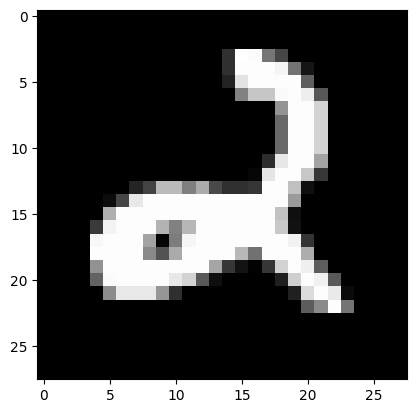

Label: 2


In [8]:
import matplotlib.pyplot as plt

# Display image and label.
train_features, train_labels = next(iter(train_gen))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# Modelo base

In [17]:
from sklearn.ensemble import RandomForestClassifier

nsamples, nx, ny, nrgb = train_features.shape
x_train = train_features.reshape((nsamples, nx*ny*nrgb))

clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(x_train, train_labels)

RandomForestClassifier(max_depth=10, random_state=0)

In [18]:
test_features, test_labels = next(iter(test_gen))
nsampes_test, nx_test, ny_test, nrgb_test = test_features.shape
x_test = test_features.reshape((nsampes_test, nx_test*ny_test*nrgb_test))
y_pred = clf.predict(x_test)

In [19]:
y_pred

array([7, 6, 1, 0, 9, 8, 7, 9, 6, 9, 0, 6, 9, 0, 1, 3, 9, 7, 8, 9, 9, 6,
       6, 5, 9, 0, 7, 9, 0, 1, 3, 1, 3, 0, 8, 6, 7, 1, 8, 1, 1, 7, 7, 9,
       3, 3, 1, 2, 9, 9, 6, 8, 9, 3, 6, 0, 4, 1, 9, 9, 7, 6, 9, 8, 2, 9,
       6, 9, 3, 0, 7, 0, 0, 8, 1, 7, 3, 7, 8, 7, 7, 6, 2, 7, 8, 4, 7, 5,
       6, 8, 3, 6, 8, 3, 1, 9, 1, 9, 6, 9])

### Scores

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_pred, test_labels)

0.63

In [24]:
print(classification_report(y_pred, test_labels))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.86      1.00      0.92        12
           2       0.25      0.67      0.36         3
           3       0.64      0.70      0.67        10
           4       0.14      1.00      0.25         2
           5       0.14      0.50      0.22         2
           6       1.00      0.71      0.83        14
           7       0.80      0.80      0.80        15
           8       0.50      0.09      0.15        11
           9       0.73      0.38      0.50        21

    accuracy                           0.63       100
   macro avg       0.61      0.67      0.56       100
weighted avg       0.75      0.63      0.65       100



# MLP

# Rede Convolucional

In [11]:
input_size = 784 # img_size = (28,28) ---> 28*28=784 in total
hidden_size = 500 # number of nodes at hidden layer
num_classes = 10 # number of output classes discrete range [0,9]
num_epochs = 20 # number of times which the entire dataset is passed throughout the model
batch_size = 64 # the size of input data took for one iteration
lr = 1e-3 # size of step

In [9]:
class Net(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(Net,self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, num_classes)

  def forward(self,x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    return out

In [12]:
net = Net(input_size, hidden_size, num_classes)
if torch.cuda.is_available():
  net.cuda()

In [15]:
print(torch.__version__, torch.cuda.is_available())

2.0.1+cu118 False


In [13]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam( net.parameters(), lr=lr)

### Training

**Colocar ambiente de GPU para fazer funcionar**

In [14]:
for epoch in range(num_epochs):
  for i ,(images,labels) in enumerate(train_gen):
    images = Variable(images.view(-1,28*28)).cuda()
    labels = Variable(labels).cuda()

    optimizer.zero_grad()
    outputs = net(images)
    loss = loss_function(outputs, labels)
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0:
      print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, len(train_data)//batch_size, loss.data[0]))

RuntimeError: ignored

# Rede Convolucional consolidada

# Comparação